In [62]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier,plot_tree

import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report


In [30]:
#Load the dataset
df = pd.read_csv(r'diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
## get the info of the dataset
df.info()
## this explains the datas types of each entity and also tells us if any column had any null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

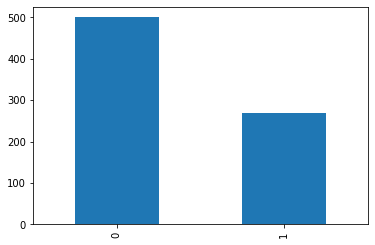

In [33]:
## Plot the frequency order of all columns
df.Outcome.value_counts().plot(kind='bar')
## From this data we can say that , the data is not correctly balanced since one category is having more samples that 
## other category.


## Predictors Distribution 

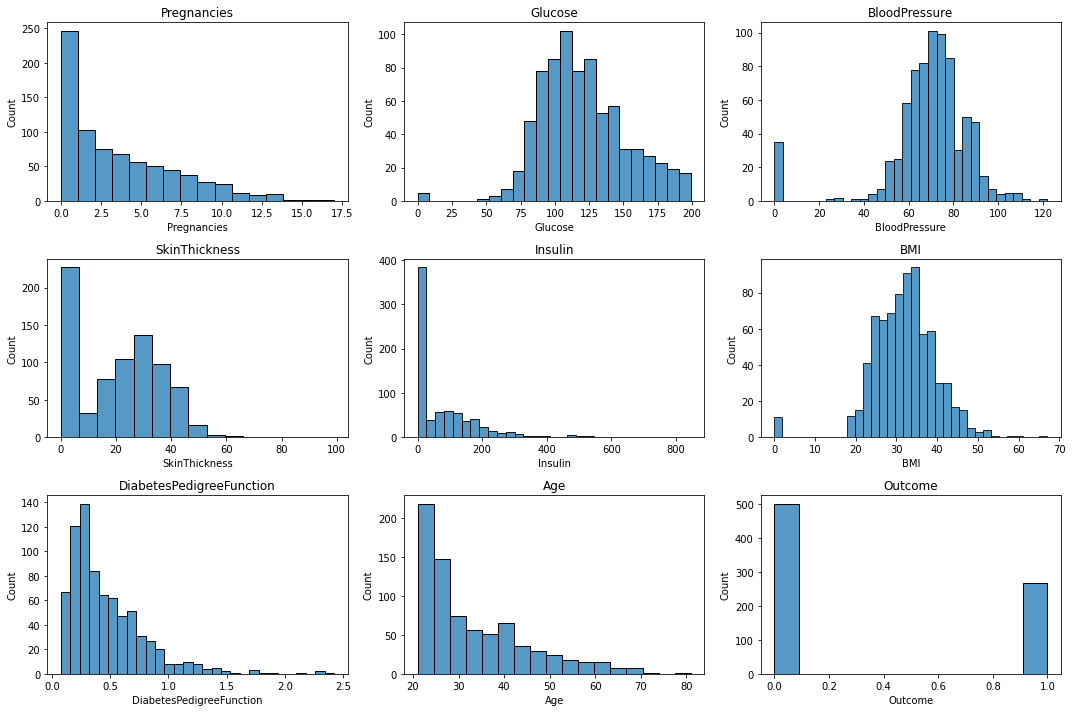

In [60]:
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()

plt.figure(figsize=(15,10))
for i,feature  in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(data=df, x=feature,palette="Winter")
    
    plt.tight_layout()
    plt.title(feature)
plt.show()

## Predictors effecting on Target

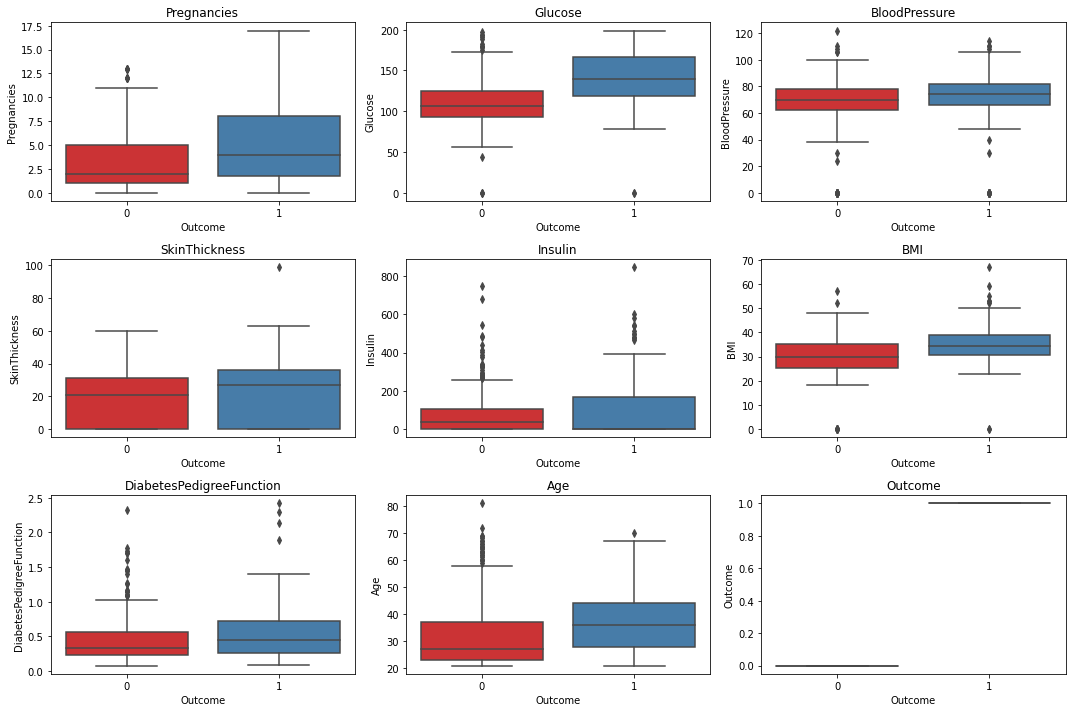

In [34]:
# for all numerical variables with outcome draw box plots
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()

plt.figure(figsize=(15,10))
for i, variable in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(df["Outcome"],df[variable],palette="Set1")
    plt.tight_layout()
    plt.title(variable)
plt.show()

## Correlation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses

In [35]:
#Let's create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [36]:
# creating a list of column names
feature_names = df.drop('Outcome',axis=1).columns.tolist()

In [37]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [38]:
X_train

array([[  7.   , 184.   ,  84.   , ...,  35.5  ,   0.355,  41.   ],
       [  6.   ,  85.   ,  78.   , ...,  31.2  ,   0.382,  42.   ],
       [  2.   , 106.   ,  64.   , ...,  30.5  ,   1.4  ,  34.   ],
       ...,
       [  1.   ,  97.   ,  70.   , ...,  38.1  ,   0.218,  30.   ],
       [  6.   , 190.   ,  92.   , ...,  35.5  ,   0.278,  66.   ],
       [  4.   , 144.   ,  58.   , ...,  29.5  ,   0.287,  37.   ]])

In [39]:
## import decision tree classifier
decision_tree = DecisionTreeClassifier().fit(X_train,y_train)
decision_tree

DecisionTreeClassifier()

In [40]:
## get parameters in decision_tree
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [41]:
decision_tree.get_n_leaves()

92

In [42]:
decision_tree.get_depth()

11

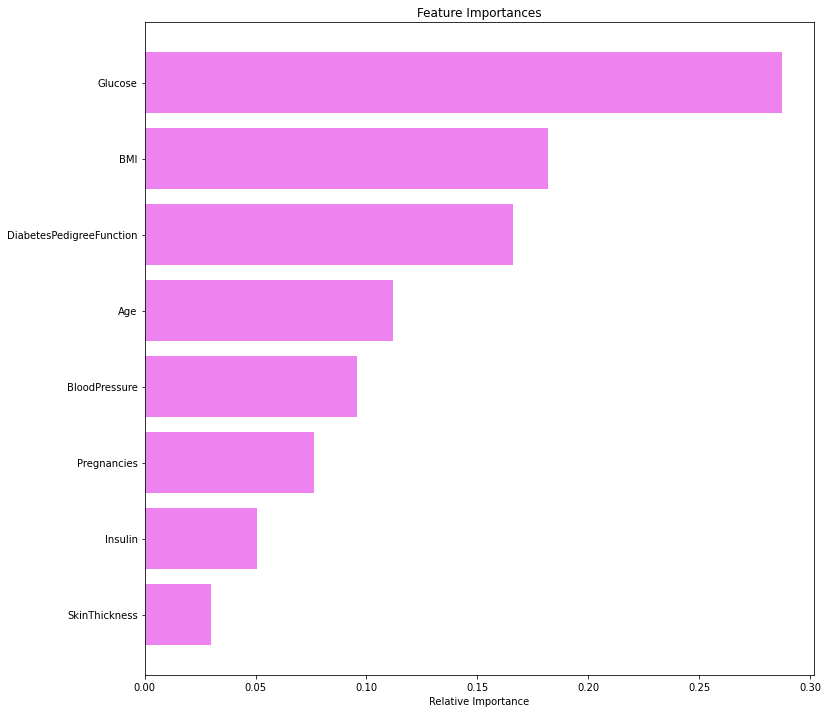

In [43]:
importances = decision_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

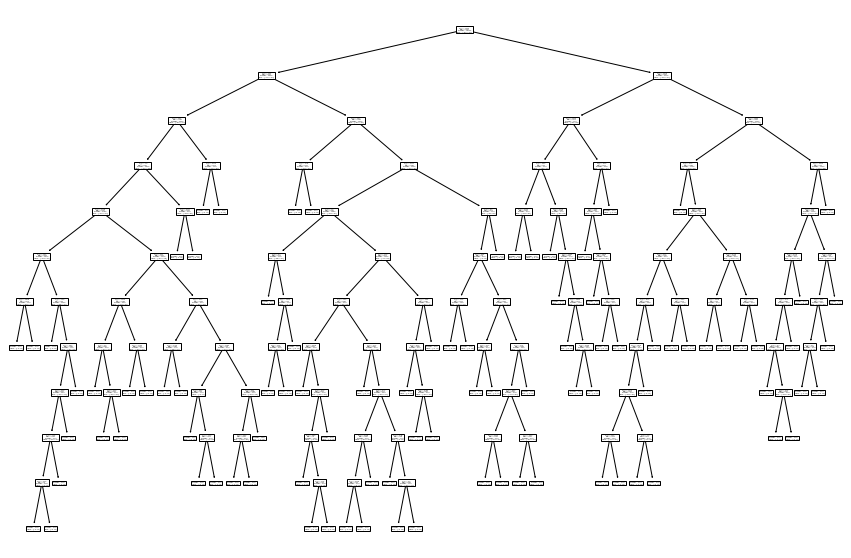

In [44]:
plt.figure(figsize=(15,10))
plot_tree(decision_tree,proportion=True);

In [45]:
y_pred = decision_tree.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[131,  19],
       [ 35,  46]], dtype=int64)

In [46]:
accuracy_score(y_test,y_pred)

0.7662337662337663

## Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

In [63]:
#let us get the predictions using the classifier we had fit above
y_pred = decision_tree.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[131,  19],
       [ 35,  46]], dtype=int64)

## Classification Report
It is a text summary of the precision, recall, F1 score for each class. Scikit-learn provides facility to calculate Classification report using the classification_report method.

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.71      0.57      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231

